In [88]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [89]:
##設定(菊池)

##SDE parameter
mu_1 = 0.04
mu_2 = 0.02
sigma_1 = 0.3
sigma_2 = 0.4
T = 8
rho_1 = 0.8
rho_2 = 0.8

h = 0.3

##MC parameter
n = 80
M = 100000

delta = T/n
m = int(h / delta)

In [90]:
##BMをn分割した時間毎に用意
def BM(T,n):
    s = [0] * (n + 1)
    for i in range(n):
        s[i + 1] = s[i] + np.random.normal(0,delta ** 0.5)
    return s

In [93]:
def StocArea(mu_1,mu_2,sigma_1,sigma_2,rho_1,rho_2,T,n,M,h):

    delta = T/n
    m = int(h / delta)

    StocArea = [0] * M

    for j in range(M):
        B_0 = BM(T,n)
        B_1 = BM(T,n)
        B_2 = BM(T,n)


        H_1 = [0] * (n + 1) 
        H_2 = [0] * (n + 1)
    
    

        for i in range(n + 1):
            H_1[i] = rho_1 * B_0[i] + math.sqrt(1 - rho_1 ** 2) * B_1[i]
            if i>= m:
                H_2[i] = rho_2 * B_0[i - m] + math.sqrt(1 - rho_2 ** 2) * B_2[i]

    
        Y_1 = [0] * (n + 1) 
        Y_2 = [0] * (n + 1)
    
        for i in range(m,n + 1):
            Y_1[i] = (mu_1 - 1/2 * sigma_1 ** 2) * delta * (i-m) + sigma_1 * (H_1[i] - H_1[m])
            Y_2[i] = (mu_2 - 1/2 * sigma_2 ** 2) * delta * (i-m) + sigma_2 * (H_2[i] - H_2[m])
        
        for i in range(m,n):
            StocArea[j] += Y_1[i] * Y_2[i + 1] - Y_1[i + 1] * Y_2[i]
    
    #StocArea.sort()
        
    #print(StocArea)

    plt.hist(StocArea,bins = 1000);


[-3.98085213248062, -3.940115705101503, -3.590309149653657, -3.472540927681651, -3.4306181960729583, -3.414150256623008, -3.411315765249315, -3.410244734812977, -3.332046396475441, -3.331693718602605, -3.3033608250359965, -3.273598140109798, -3.2280072142443603, -3.1526834620713635, -3.0995830619117672, -3.0707162952888862, -3.0486851617449453, -3.0453023808308846, -2.9775566962378712, -2.960647318861143, -2.939838753251025, -2.924502024192947, -2.8609233445802893, -2.851541141938382, -2.847021218641024, -2.836236819732573, -2.8126011118092613, -2.8101317302251885, -2.7990175752663453, -2.794314572265124, -2.78886671031824, -2.786287749197833, -2.7541122882059454, -2.7413691742716177, -2.7251492562612603, -2.7246374467888463, -2.7219828644113946, -2.715698315897912, -2.709613437338908, -2.703344004212351, -2.700978907657719, -2.6928126884174044, -2.669039067201255, -2.660841376635717, -2.659991549106109, -2.657373760672699, -2.653974426684548, -2.6536356633977327, -2.6394477256158857, 

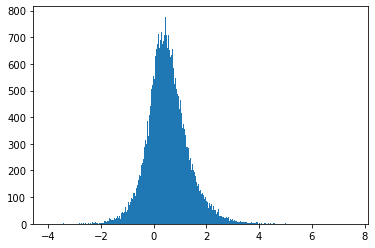

In [92]:
StocArea(mu_1,mu_2,sigma_1,sigma_2,rho_1,rho_2,T,n,M,h=0.5)

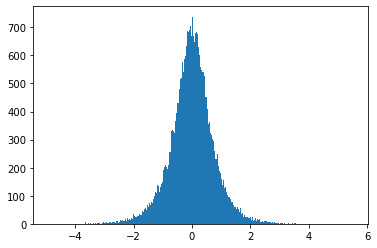

In [94]:
StocArea(mu_1,mu_2,sigma_1,sigma_2,rho_1,rho_2,T,n,M,h=0)

In [24]:
print(BM(T,n))

[0, 0.02537133112026211, -0.06483950467134592, -0.02564997125321828, -0.4047999410437216, -0.8897662095682506, -0.770296435269181, -0.5744859682562071, -0.6177050949969508, -0.33656163379092, -0.5213150263691027, -0.47126243526716394, -0.8079310200352721, -0.5374568912050206, -0.247540861097153, -0.24661246149913793, -0.4787133313677232, -1.4042141170111435, -1.3676307964084682, -1.9440347044151036, -2.49998603458617, -2.116288876057918, -2.575582744851837, -2.5464151542930646, -2.9114233758586234, -2.579262988608888, -2.752325333766203, -2.2425654982526018, -1.9177994523504216, -1.9550757331797448, -2.131906541945746, -1.8168148311685324, -2.107254350937922, -1.7633121789487336, -1.7247868152800832, -1.296488621191271, -1.632174889364967, -1.7811078239116467, -1.285529048036423, -1.6867877738200603, -0.9213005649280334, -0.9274977154089347, -1.1957170140257374, -1.1352071271039357, -0.3654322953668022, -0.8761859384196156, -0.9515884966403534, -1.0306390489806037, -0.6886346596537639,

In [26]:
a = 0
b = 0
for _ in range(100000):
    a += BM(T,n)[n]
    b += BM(T,n)[n] ** 2
a = a/100000
b = b/100000
print(a)
print(b)

0.019810627183255724
7.996132911142587
